In [43]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
from datetime import datetime

# 'second_phase' or 'grain_size' as first directory
# 'full' or 'extrusion' (for subset of n=43 of only extrusion process) as second directory
FOLDER = 'second_phase/extrusion/out'


In [44]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in second_phase/extrusion/out: 3


In [45]:
compiled_res_list = []
conf_mats = []

for results in all_res:
    print(results)
    res_full = load_pickle(results)
    res = res_full['results']
    print(res_full['data_summary'])
    print('\n')
    summary = {
        'size': res_full['train_size'],
        'representation': res_full['data_summary']['representation'],
        'representation': res_full['data_summary']['representation'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true']))
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

second_phase/extrusion/out/20240215-170814_25_50_predictions.pkl
{'datafile': 'HEREON_extruded_final.csv', 'target': 'second_phase_bin', 'representation': 'total_string'}


second_phase/extrusion/out/20240215-171713_25_50_predictions.pkl
{'datafile': 'HEREON_extruded_final.csv', 'target': 'second_phase_bin', 'representation': 'total_string'}


second_phase/extrusion/out/20240215-171244_25_50_predictions.pkl
{'datafile': 'HEREON_extruded_final.csv', 'target': 'second_phase_bin', 'representation': 'total_string'}




In [46]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['bins', 'num_epochs', 'representation', 'size']).agg(['mean', 'sem'])


In [47]:
grouped_res


accuracy            f1_macro            \
                                         mean       sem      mean       sem   
bins num_epochs representation size                                           
2    50         total_string   25    0.537037  0.048995  0.505365  0.040819   

                                     f1_micro               kappa            \
                                         mean       sem      mean       sem   
bins num_epochs representation size                                           
2    50         total_string   25    0.537037  0.048995  0.074074  0.097991   

                                         lr       
                                       mean  sem  
bins num_epochs representation size               
2    50         total_string   25    0.0003  0.0

/tmp/ipykernel_2876807/1141757016.py:39: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)


Text(0.5, 0.98, 'HEREON - total_string - real - 2 bins')

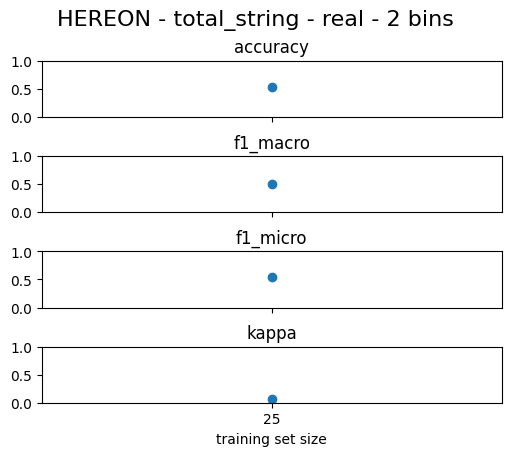

In [48]:
from scipy.stats import sem
from scipy.constants import golden
ONE_COL_WIDTH_INCH = 5
TWO_COL_WIDTH_INCH = 7.2

ONE_COL_GOLDEN_RATIO_HEIGHT_INCH = ONE_COL_WIDTH_INCH / golden
TWO_COL_GOLDEN_RATIO_HEIGHT_INCH = TWO_COL_WIDTH_INCH / golden

BINS = 2
REPRESENTATION = 'total_string'

fig, ax = plt.subplots(4, 1,figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH), constrained_layout = True, sharex=True)
 
for num_epochs in [50]:
    for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
        ax[i].plot(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index, 
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'],
            marker='o',
            label=f'{num_epochs} epochs'
        )
        ax[i].fill_between(
            grouped_res.loc[BINS, num_epochs,REPRESENTATION].index,
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] - grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['mean'] + grouped_res.loc[BINS, num_epochs,REPRESENTATION][metric]['sem'],
            alpha=0.2
        )
        ax[i].set_ylim(0,1)
        ax[i].set_xticks(list(compiled_res['size'].unique()))
        ax[i].set_title(metric)
    #ylabel_top('accuracy', ax=ax[0])
    #ylabel_top(r'F$_1$ macro', ax=ax[1])
    #ylabel_top(r'F$_1$ micro', ax=ax[2])
    #ylabel_top(r'$\kappa$', ax=ax[3])
ax[-1].set_xlabel('training set size')


#matplotx.line_labels(ax[0])
plt.subplots_adjust(hspace=0.6, top=1, bottom=0.2)

now = datetime.now().strftime('%Y%m%d_%H%M') 
fig.suptitle('HEREON - {} - {} - {} bins'.format(REPRESENTATION, 'real', BINS), fontsize=16)
#fig.savefig(f'{now}_hydrides-{REPRESENTATION}-real-{BINS}bin-classification-results.pdf', bbox_inches='tight')

              precision    recall  f1-score   support

           0       0.75      0.33      0.46         9
           1       0.57      0.89      0.70         9

    accuracy                           0.61        18
   macro avg       0.66      0.61      0.58        18
weighted avg       0.66      0.61      0.58        18



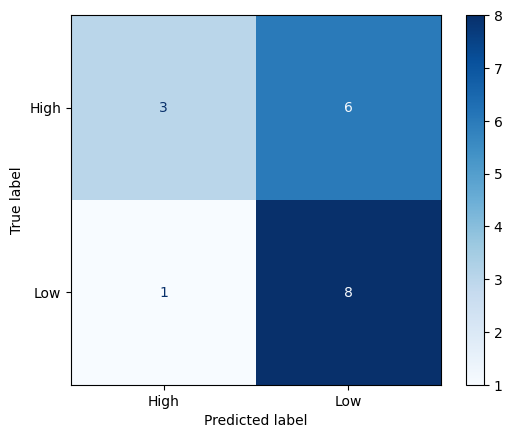

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.53      0.89      0.67         9

    accuracy                           0.56        18
   macro avg       0.60      0.56      0.50        18
weighted avg       0.60      0.56      0.50        18



<Figure size 640x480 with 0 Axes>

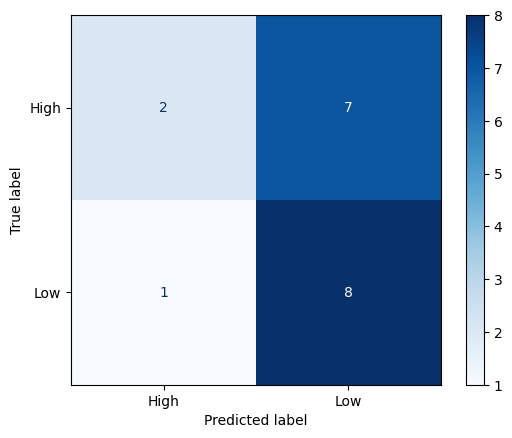

              precision    recall  f1-score   support

           0       0.43      0.33      0.38         9
           1       0.45      0.56      0.50         9

    accuracy                           0.44        18
   macro avg       0.44      0.44      0.44        18
weighted avg       0.44      0.44      0.44        18



<Figure size 640x480 with 0 Axes>

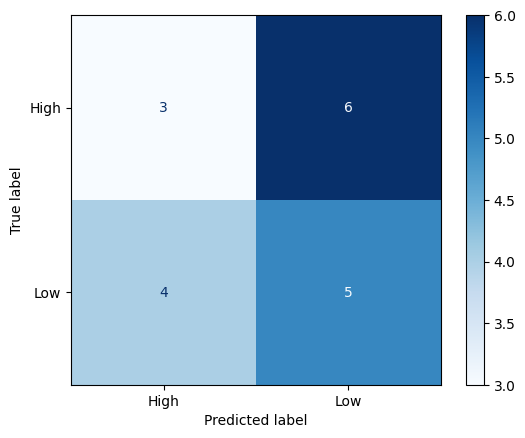

<Figure size 640x480 with 0 Axes>

In [49]:
from sklearn.metrics import classification_report
from sklearn import metrics
for index, _ in enumerate(conf_mats):
    try:
        preds = conf_mats[index]
        actual	= preds['all_y_true']
        predicted	= preds['all_y_pred']

        gpt_metrics = compiled_res.iloc[index]
        confusion_matrix = metrics.confusion_matrix(actual, predicted)
        print(classification_report(actual, predicted))

        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['High','Low'])
        cm_display.plot(cmap=plt.cm.Blues)

        bar_labels = {'min_pdb':'LLPS- / PDB*', 'min_plus':'LLPS+ / LLPS -', 'pdb_plus':'LLPS+ / PBD*'}

        #plt.title('{} \n(Accuracy : {}%)'.format(bar_labels[gpt_metrics['target']],round(100*gpt_metrics['accuracy'], 2)))
        if not os.path.exists('ConfusionMatrices'):
            os.mkdir('ConfusionMatrices')
        plt.savefig('conf.pdf')
        plt.show()
    except Exception as e:
        print(e)
    plt.clf()